In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cases_state = pd.read_csv('cases_state.csv')
cases_state

,date,state,cases_new,cases_import,cases_recovered
0,2020-01-25,Johor,4,4,0.0
1,2020-01-25,Kedah,0,0,0.0
2,2020-01-25,Kelantan,0,0,0.0
3,2020-01-25,Melaka,0,0,0.0
4,2020-01-25,Negeri Sembilan,0,0,0.0
...,...,...,...,...,...
9451,2021-09-06,Selangor,2126,0,NaN
9452,2021-09-06,Terengganu,700,0,NaN
9453,2021-09-06,W.P. Kuala Lumpur,398,6,NaN
9454,2021-09-06,W.P. Labuan,5,0,NaN


In [3]:
cases_state.dtypes

date                object
state               object
cases_new            int64
cases_import         int64
cases_recovered    float64
dtype: object

In [4]:
cases_state.isnull()

,date,state,cases_new,cases_import,cases_recovered
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
9451,False,False,False,False,True
9452,False,False,False,False,True
9453,False,False,False,False,True
9454,False,False,False,False,True


In [5]:
cases_state.drop_duplicates()

,date,state,cases_new,cases_import,cases_recovered
0,2020-01-25,Johor,4,4,0.0
1,2020-01-25,Kedah,0,0,0.0
2,2020-01-25,Kelantan,0,0,0.0
3,2020-01-25,Melaka,0,0,0.0
4,2020-01-25,Negeri Sembilan,0,0,0.0
...,...,...,...,...,...
9451,2021-09-06,Selangor,2126,0,NaN
9452,2021-09-06,Terengganu,700,0,NaN
9453,2021-09-06,W.P. Kuala Lumpur,398,6,NaN
9454,2021-09-06,W.P. Labuan,5,0,NaN


In [6]:
cases_state.describe()

,cases_new,cases_import,cases_recovered
count,9456.000000,9456.000000,9296.000000
mean,196.931789,0.485406,148.344019
std,604.860962,2.190890,495.449185
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,7.000000,0.000000,4.000000
75%,124.250000,0.000000,90.000000
max,8792.000000,72.000000,8803.000000


In [7]:
#we decide to fill all the null value with zero,since only cases recovered have null value
#and the value is null because the still havent updated the recovered cases or 
#maybe there are no patient recovered
cases_state.fillna((0), inplace=True)
cases_state.describe()

,cases_new,cases_import,cases_recovered
count,9456.000000,9456.000000,9456.000000
mean,196.931789,0.485406,145.833968
std,604.860962,2.190890,491.611715
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,7.000000,0.000000,3.000000
75%,124.250000,0.000000,85.000000
max,8792.000000,72.000000,8803.000000


In [8]:
states = cases_state['state'].unique()
states

array(['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan',
       'Pahang', 'Pulau Pinang', 'Perak', 'Perlis', 'Sabah', 'Sarawak',
       'Selangor', 'Terengganu', 'W.P. Kuala Lumpur', 'W.P. Labuan',
       'W.P. Putrajaya'], dtype=object)

In [90]:
#calculate each states total cases
#last100row = cases_state.iloc[-100:]
each_state_total_cases = cases_state.groupby(["state"]).agg({"cases_new": "sum"})
each_state_total_cases = each_state_total_cases.reset_index()
each_state_total_cases = each_state_total_cases.rename(columns={"cases_new" : "total_cases"})
each_state_total_cases["total_cases"] = each_state_total_cases["total_cases"].astype('float')
each_state_total_cases

,state,total_cases
0,Johor,151459.0
1,Kedah,109067.0
2,Kelantan,85358.0
3,Melaka,50765.0
4,Negeri Sembilan,93042.0
5,Pahang,47365.0
6,Perak,74960.0
7,Perlis,2372.0
8,Pulau Pinang,96656.0
9,Sabah,161265.0


In [91]:
population = pd.read_csv('population.csv')
population.drop(['pop_18','pop_60','idxs'],axis='columns', inplace=True)
population.drop(0,axis='rows', inplace=True)
state_index = np.arange(16)
population.index = state_index
population

,state,pop
0,Johor,3781000
1,Kedah,2185100
2,Kelantan,1906700
3,Melaka,932700
4,Negeri Sembilan,1128800
5,Pahang,1678700
6,Pulau Pinang,1773600
7,Perak,2510300
8,Perlis,254900
9,Selangor,6538000


In [92]:
temp = population.iloc[6]
population.iloc[6] = population.iloc[7]
population.iloc[7] = temp
temp = population.iloc[7]
population.iloc[7] = population.iloc[8]
population.iloc[8] = temp
temp = population.iloc[9]
population.iloc[9] = population.iloc[11]
population.iloc[11] = temp
temp = population.iloc[10]
population.iloc[10] = population.iloc[12]
population.iloc[12] = temp
population

,state,pop
0,Johor,3781000
1,Kedah,2185100
2,Kelantan,1906700
3,Melaka,932700
4,Negeri Sembilan,1128800
5,Pahang,1678700
6,Perak,2510300
7,Perlis,254900
8,Pulau Pinang,1773600
9,Sabah,3908500


In [93]:
each_state_total_cases["total_cases"] = each_state_total_cases["total_cases"] / population["pop"]

In [94]:
each_state_total_cases_devide_by_population = each_state_total_cases.rename(columns ={"total_cases" : "total_cases / Population"})
each_state_total_cases_devide_by_population

,state,total_cases / Population
0,Johor,0.040058
1,Kedah,0.049914
2,Kelantan,0.044767
3,Melaka,0.054428
4,Negeri Sembilan,0.082426
5,Pahang,0.028215
6,Perak,0.029861
7,Perlis,0.009306
8,Pulau Pinang,0.054497
9,Sabah,0.041260


In [95]:
column_maxes = each_state_total_cases_devide_by_population['total_cases / Population'].max()
each_state_total_cases_devide_by_population['total_cases / Population'] = each_state_total_cases_devide_by_population['total_cases / Population'] / column_maxes
each_state_total_cases_devide_by_population

,state,total_cases / Population
0,Johor,0.401442
1,Kedah,0.500214
2,Kelantan,0.448638
3,Melaka,0.545452
4,Negeri Sembilan,0.826030
5,Pahang,0.282760
6,Perak,0.299253
7,Perlis,0.093256
8,Pulau Pinang,0.546144
9,Sabah,0.413489


In [96]:
outlierDetection = each_state_total_cases_devide_by_population

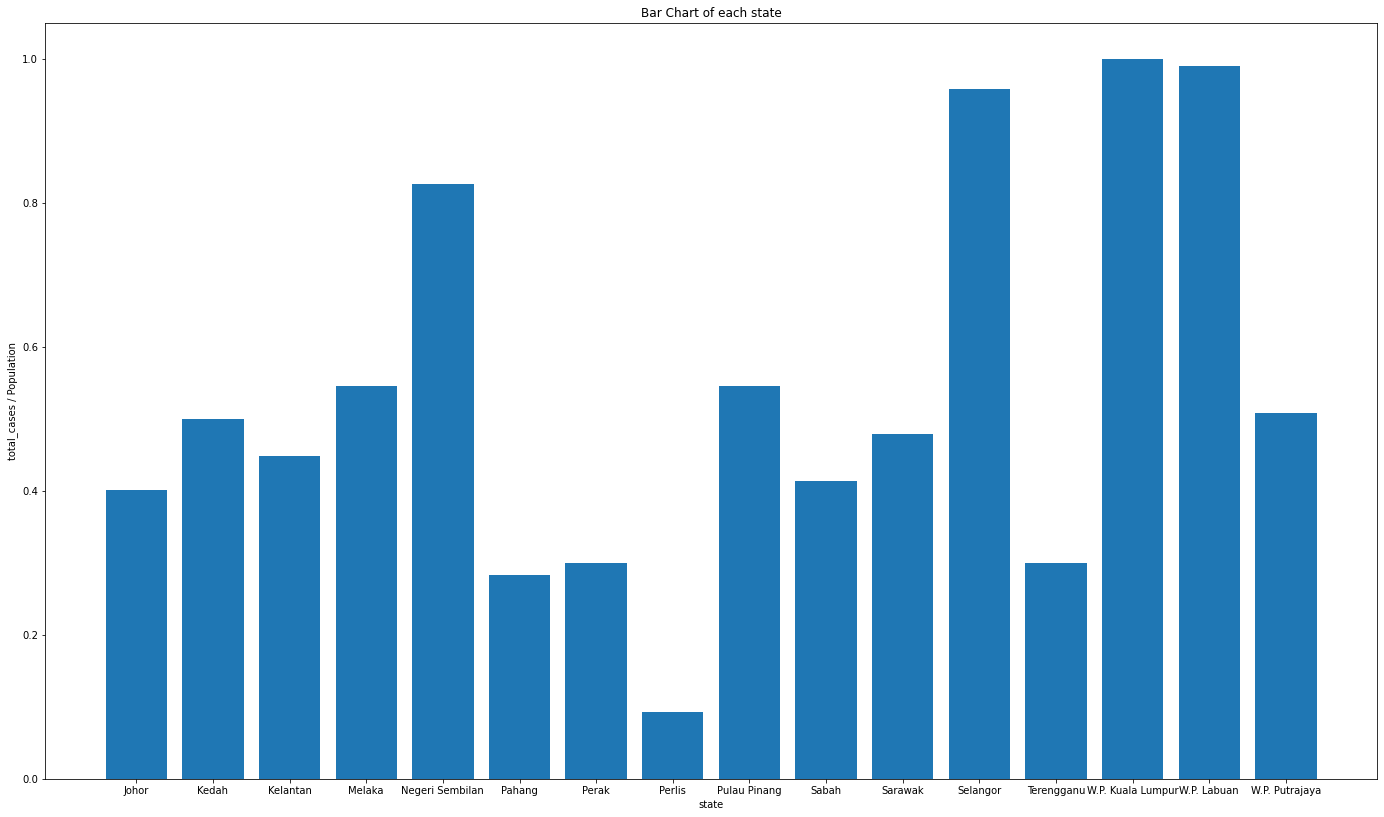

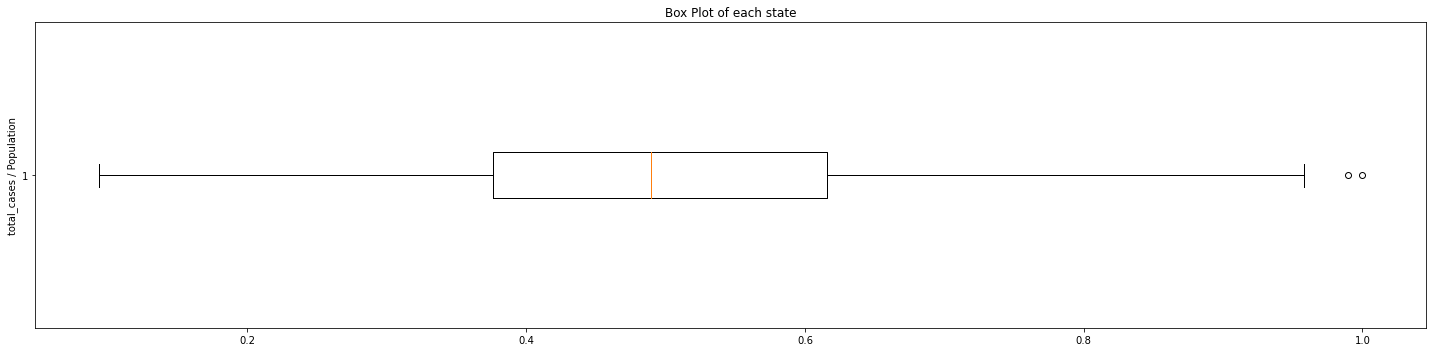

In [129]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
ax = fig.add_axes([0,0,1,1])
ax.bar(outlierDetection['state'], outlierDetection['total_cases / Population'],data = outlierDetection)
ax.set_ylabel('total_cases / Population')
ax.set_xlabel('state')
ax.set_title('Bar Chart of each state')
plt.show()

fig = plt.figure(figsize=(20,5))
plt.boxplot(outlierDetection['total_cases / Population'],vert = False)
plt.title("Box Plot of each state")
plt.ylabel("total_cases / Population")
plt.tight_layout()
plt.show()

In [125]:
Q1 = outlierDetection.quantile(0.25)
Q3 = outlierDetection.quantile(0.75)
IQR = Q3 - Q1
IQR['total_cases / Population']

0.24006381531888288

In [136]:
#Categerize each state risk the base on their iqr range

VeryHighRisk = outlierDetection[outlierDetection['total_cases / Population'] > (Q3['total_cases / Population'] + IQR['total_cases / Population'])]
print('Very High Risk States')
display(VeryHighRisk)

HighRisk = outlierDetection[outlierDetection['total_cases / Population'] >= Q3['total_cases / Population']]
HighRisk = HighRisk[HighRisk['total_cases / Population'] < (Q3['total_cases / Population'] + IQR['total_cases / Population'])]
print('High Risk States')
display(HighRisk)

MediumRisk = outlierDetection[outlierDetection['total_cases / Population'] >= Q1['total_cases / Population']]
MediumRisk = MediumRisk[MediumRisk['total_cases / Population'] < Q3['total_cases / Population']]
print('Medium Risk States')
display(MediumRisk)

LowRisk = outlierDetection[outlierDetection['total_cases / Population'] < Q1['total_cases / Population']]
print('Low Risk States')
display(LowRisk)

Very High Risk States


,state,total_cases / Population
11,Selangor,0.958282
13,W.P. Kuala Lumpur,1.000000
14,W.P. Labuan,0.989978


High Risk States


,state,total_cases / Population
4,Negeri Sembilan,0.82603


Medium Risk States


,state,total_cases / Population
0,Johor,0.401442
1,Kedah,0.500214
2,Kelantan,0.448638
3,Melaka,0.545452
8,Pulau Pinang,0.546144
9,Sabah,0.413489
10,Sarawak,0.478970
15,W.P. Putrajaya,0.508000


Low Risk States


,state,total_cases / Population
5,Pahang,0.282760
6,Perak,0.299253
7,Perlis,0.093256
12,Terengganu,0.299882


In [145]:
tests_state = pd.read_csv('tests_malaysia.csv')
tests_state

,date,rtk-ag,pcr
0,2020-01-24,0,2
1,2020-01-25,0,5
2,2020-01-26,0,14
3,2020-01-27,0,24
4,2020-01-28,0,53
...,...,...,...
585,2021-08-31,55573,67125
586,2021-09-01,96183,69043
587,2021-09-02,90232,70035
588,2021-09-03,77745,69765


In [146]:
tests_state.dtypes

date      object
rtk-ag     int64
pcr        int64
dtype: object

In [147]:
#mean this dataset no null value
tests_state.isna().sum()

date      0
rtk-ag    0
pcr       0
dtype: int64

In [148]:
tests_state.drop_duplicates()

,date,rtk-ag,pcr
0,2020-01-24,0,2
1,2020-01-25,0,5
2,2020-01-26,0,14
3,2020-01-27,0,24
4,2020-01-28,0,53
...,...,...,...
585,2021-08-31,55573,67125
586,2021-09-01,96183,69043
587,2021-09-02,90232,70035
588,2021-09-03,77745,69765


In [149]:
#All null value will be filled up with zero since ,null mean no people is te
tests_state.fillna((0), inplace=True)
tests_state.describe()

,rtk-ag,pcr
count,590.000000,590.000000
mean,19547.216949,26174.510169
std,24017.358347,23476.395861
min,0.000000,2.000000
25%,1046.250000,5919.000000
50%,6337.000000,18607.000000
75%,32767.000000,42023.750000
max,96219.000000,90293.000000


In [151]:
#we decide to add a new column into the dataset ,which is total testing for the date
total_testing = tests_state['rtk-ag'] + tests_state['pcr']
tests_state['total_testing'] = total_testing
tests_state 

,date,rtk-ag,pcr,total_testing
0,2020-01-24,0,2,2
1,2020-01-25,0,5,5
2,2020-01-26,0,14,14
3,2020-01-27,0,24,24
4,2020-01-28,0,53,53
...,...,...,...,...
585,2021-08-31,55573,67125,122698
586,2021-09-01,96183,69043,165226
587,2021-09-02,90232,70035,160267
588,2021-09-03,77745,69765,147510


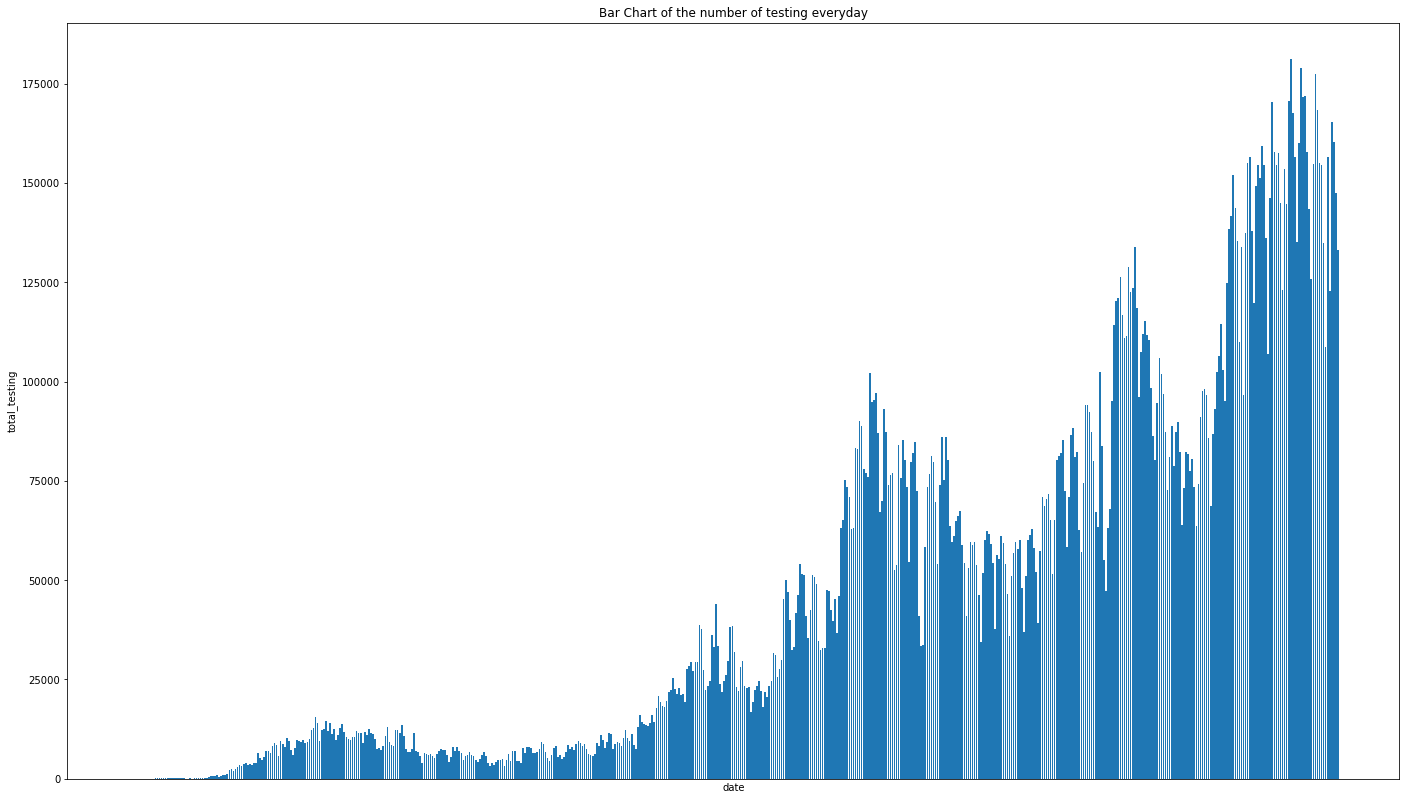

In [155]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
ax = fig.add_axes([0,0,1,1])
ax.bar(tests_state['date'], tests_state['total_testing'],data = tests_state)
ax.set_ylabel('total_testing')
ax.set_xlabel('date')
ax.set_xticks([])
ax.set_title('Bar Chart of the number of testing everyday')
plt.show()
